<a href="https://colab.research.google.com/github/Pranayshukla0610/Ensemble_learning_machine_learning/blob/main/VotingRegressor_On_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('/content/data (3).csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [8]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [9]:
df['bed_bath_ratio'] = df['bedrooms']/(df['bathrooms']+1)

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,bed_bath_ratio
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.200000
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1.428571
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1.000000
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0.923077
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1.142857


In [11]:
df['total_area'] = df['sqft_living'] + df['sqft_lot']

In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,bed_bath_ratio,total_area
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.200000,9252
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1.428571,12700
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1.000000,13877
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0.923077,10030
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1.142857,12440


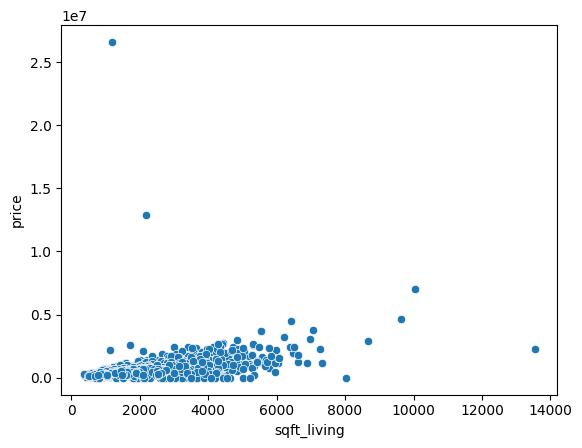

In [13]:
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.show()

In [14]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x = 'sqft_living',
    y='sqft_lot',
    z= 'price'
)
fig.show()

In [17]:
df['price'] = df['price'].astype(int)

In [18]:
X = df.drop('price',axis=1)
y = df['price']

In [21]:
X.select_dtypes(exclude=['number']).columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [22]:
X = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [24]:
X

array([[-0.44112227, -0.84320364, -0.82997105, ...,  1.22167046,
         0.34032882, -0.21442685],
       [ 1.75970468,  0.43280154,  1.56852826, ..., -0.82569345,
         1.1429977 , -0.11890271],
       [-0.44112227, -0.20520105, -0.21736733, ..., -0.82569345,
        -0.36200646, -0.08629484],
       ...,
       [-0.44112227,  0.43280154,  0.90400897, ..., -0.82569345,
        -0.86367452, -0.1930392 ],
       [ 0.6592912 , -0.20520105, -0.05123751, ..., -0.82569345,
         0.80855233, -0.2291655 ],
       [-0.44112227,  0.43280154, -0.67422434, ..., -0.82569345,
        -0.86367452, -0.20500742]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [27]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [28]:
from sklearn.ensemble import VotingRegressor

vot_reg = VotingRegressor(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('svr',svr),
        ('knn',knn)
    ]
)

In [29]:
vot_reg.fit(X_train, y_train)
pred = vot_reg.predict(X_test)

In [30]:
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:", r2_score(y_test,pred))

RMSE: 992352.5334915878
R2 Score: 0.03440007740334805


In [31]:
vote_weighted = VotingRegressor(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('svr',svr),
        ('knn',knn)
    ],
    weights = [2,1,3,1]
)

In [32]:
vote_weighted.fit(X_train, y_train)
pred = vote_weighted.predict(X_test)

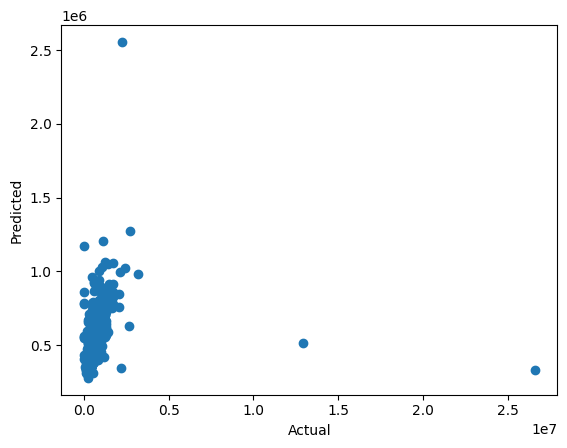

In [33]:
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

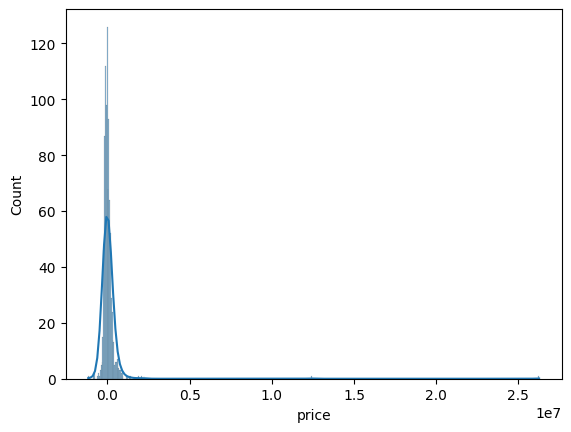

In [34]:
residuals = y_test - pred
sns.histplot(residuals, kde=True)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'svr__C':[0.1,1,10],
    'knn__n_neighbors':[3,5,7]
}

grid = GridSearchCV(vote_weighted, param_grid=params, cv=3)

grid.fit(X_train,y_train)

print(grid.best_params_)


{'knn__n_neighbors': 7, 'svr__C': 1}


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=8)

X_train = selector.fit_transform(X_train,y_train)
X_test = selector.transform(X_test)
